# Classification, Correlation, and Network Dynamics: A Case Study Approach to Data Science

In this project, we are going to do the following things:

* **Case Study 1:** k-Nearest Neighbors classification
* **Case Study 2:** classify whisky
* **Case Study 3:** use GPS data to track the migration patterns of birds
* **Case Study 4:** analyze social networks

## Case Study 1: k-Nearest Neighbors classification

In this case study, we will analyze a dataset consisting of an assortment of wines classified as *high quality* and *low quality* and will use **k-Nearest Neighbors classification** to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.

In [1]:
import numpy as np, random, scipy.stats as ss

def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

In [2]:
import pandas as pd

file = "./wines.csv"

wines = pd.read_csv(file, index_col=0)

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
is_red = []
for i in wines.color:
    if i == "red":
        is_red.append(1)
    else:
        is_red.append(0)

wines["is_red"] = is_red

wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1,0


In [4]:
len(wines[wines.is_red == 1])

1599

In [5]:
numeric_data = wines.drop(["color", "high_quality", "quality"], axis=1)
# 'axis=1' because we're dropping a column

numeric_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0


In [6]:
wines["is_red"] = (wines["color"] == "red").astype(int)
numeric_data = wines.drop("color", axis=1)

numeric_data.groupby('is_red').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
is_red,,,,,,,,,,,,,
0,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
1,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599


In [7]:
import sklearn.preprocessing
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns = numeric_data.columns)

columns = numeric_data.columns

import sklearn.decomposition
pca = sklearn.decomposition.PCA()
principal_components = pca.fit_transform(numeric_data)

principal_components.shape

(6497, 14)

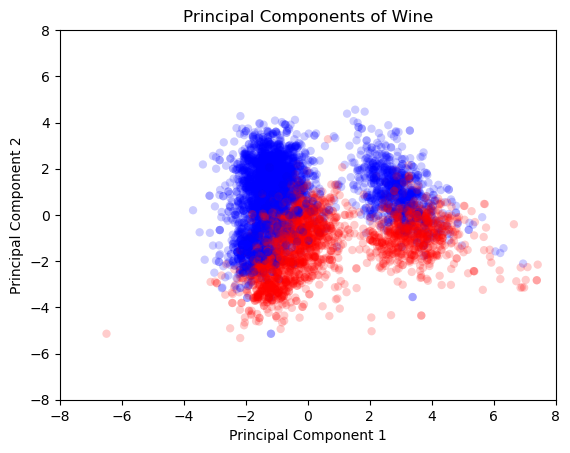

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = wines['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
plt.savefig("Principle Components of Wine.png")

**Result:** We could not easily draw a linear boundary between the high and low quality wines using the first two principle components

In [9]:
import numpy as np 
np.random.seed(1) # do not change

x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

def accuracy(predictions, outcomes):
    return 100*np.mean(predictions == outcomes)

accuracy(x,y)

51.5

In [10]:
print(accuracy(0, wines["high_quality"]))

36.69385870401724


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, wines['high_quality'])

library_predictions = knn.predict(numeric_data)
# to predict which wines are high/low quality

accuracy(library_predictions, wines['high_quality'])
# It return around 84, which means kNN classifier predicts more accurately from the simple classifier we defined in Exercise 6

99.96921656148992

In [12]:
n_rows = wines.shape[0]
# Enter your code here.

import random
random.seed(123)

selection = random.sample(range(n_rows), 10)

selection[9]

4392

In [13]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(wines["high_quality"])

my_predictions = []
for p in predictors[selection]:
    a = knn_predict(p, predictors[training_indices,:], outcomes[training_indices], k=5)
    my_predictions.append(a)
my_predictions = np.array(my_predictions)

percentage = accuracy(my_predictions, wines.high_quality.iloc[selection])

percentage

100.0

## Case Study 2: Whiskies

In this case study, we are going to step-by-step **prepare plots in Bokeh**, a library designed for simple, interactive plotting.  We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In [14]:
from sklearn.cluster import SpectralCoclustering

import numpy as np, pandas as pd

whisky = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@whiskies.csv", index_col=0)
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

In [15]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!

from bokeh.models import HoverTool, ColumnDataSource

# Let's plot a simple 5x5 grid of squares, alternating between two colors.
plot_values = [1,2,3,4,5]
plot_colors = ['#0173b2', '#de8f05']

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [16]:
# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)


In [17]:
# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

['#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2']


In [18]:
# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

import numpy as np
from bokeh.plotting import figure, output_file, show, output_notebook

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data = {
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)

#output_file("Basic_Example.html", title="Basic Example")
output_notebook()  # For displaying in the notebook

fig = figure(tools="hover")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {"Value": "@x, @y",}

# Show the plot in the notebook
show(fig)

Loading BokehJS ...

In [19]:
cluster_colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161']
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = zip(regions,cluster_colors)
region_colors = dict(region_colors)
region_colors

{'Speyside': '#0173b2',
 'Highlands': '#de8f05',
 'Lowlands': '#029e73',
 'Islands': '#d55e00',
 'Campbelltown': '#cc78bc',
 'Islay': '#ca9161'}

In [20]:
correlations # I just wanted to check what 'correlations' look like

array([[1.        , 0.44904168, 0.46216816, ..., 0.50475261, 0.34921515,
        0.26722197],
       [0.44904168, 1.        , 0.28977485, ..., 0.62335961, 0.74444508,
        0.7000808 ],
       [0.46216816, 0.28977485, 1.        , ..., 0.03309517, 0.07784989,
        0.16547585],
       ...,
       [0.50475261, 0.62335961, 0.03309517, ..., 1.        , 0.76520727,
        0.6626506 ],
       [0.34921515, 0.74444508, 0.07784989, ..., 0.76520727, 1.        ,
        0.76520727],
       [0.26722197, 0.7000808 , 0.16547585, ..., 0.6626506 , 0.76520727,
        1.        ]])

In [21]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if correlations[i][j] < 0.7:                   # if low correlation, # I edited this part
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i] == whisky.Group[j]:                  # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group. # I edited this part
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

# correlation_colors

We set 'white' color to the correlations below 0.7 so that we can focus our attention to the correlations above 0.7

In [22]:
type(correlations)

a = correlations.flatten().tolist()
type(a)

list

In [23]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors, # I edited this part
        "correlations": correlations.flatten().tolist() ## I edited this part
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", x_range=list(reversed(distilleries)), y_range=distilleries,
    tools="hover,box_zoom,reset")

fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')

hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

In [24]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ['#0173b2', '#de8f05', '#029e73']

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="hover, save",
    width  = 400,
    height = 400)
fig.scatter("x", "y", size=10, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {"Location": "(@x, @y)"}
show(fig)

In [25]:
print(whisky["Region"],"\n"); print(type(whisky["Region"]),"\n")

print(type(np.array(whisky["Region"])),"\n")

0     Highlands
1      Speyside
2      Speyside
3      Speyside
4      Speyside
        ...    
81    Highlands
82    Highlands
83     Speyside
84      Islands
85    Highlands
Name: Region, Length: 86, dtype: object 

<class 'pandas.core.series.Series'> 

<class 'numpy.ndarray'> 



In [26]:
# edit this to make the function `location_plot`.

def location_plot(title, colors): # I edited this part
    output_file(title+".html")
    location_source = ColumnDataSource(
        data = {
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    fig = figure(title = title,
        x_axis_location = "above", tools="hover, save",
    width  = 500,
    height = 500)
    fig.scatter("x", "y", size=9, source=location_source, color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    return show(fig)

region_cols = [] # I edited all this for-loop
for i in whisky["Region"]:
    region_cols.append(region_colors[i])
# The course suggests: [region_colors[i] for i in list(whisky["Region"])]
    
location_plot("Whisky Locations and Regions", region_cols)

In [27]:
region_cols = [region_colors[i] for i in list(whisky.Region)] # I edited this part
classification_cols = [cluster_colors[i] for i in list(whisky.Group)] # I edited this part

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)

## Case Study 3: Patterns for Flight of Birds

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [28]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [29]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [30]:
birddata.date_time

0        2013-08-15 00:18:08+00
1        2013-08-15 00:48:07+00
2        2013-08-15 01:17:58+00
3        2013-08-15 01:47:51+00
4        2013-08-15 02:17:42+00
                  ...          
61915    2014-04-30 22:00:08+00
61916    2014-04-30 22:29:57+00
61917    2014-04-30 22:59:52+00
61918    2014-04-30 23:29:43+00
61919    2014-04-30 23:59:34+00
Name: date_time, Length: 61920, dtype: object

In [31]:
birddata.date_time[0][0:10]

'2013-08-15'

In [32]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

Now apply this to find mean altitude of the birds on 2013-09-12

In [33]:
m_a_p = mean_altitudes_perday

for i in range(len(m_a_p)):
    if m_a_p.index[i] == pd.to_datetime('2013-09-12').date():
        print(i, m_a_p.iloc[i])

28 75.64609053497942


In [34]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name","date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

mean_altitudes_perday["Eric"]

date
2013-08-15     74.988095
2013-08-16    127.773810
2013-08-17    125.890244
2013-08-18    121.353659
2013-08-19    134.928571
                 ...    
2014-04-26     20.717391
2014-04-27     48.790698
2014-04-28     27.829787
2014-04-29     17.425532
2014-04-30     38.791667
Name: altitude, Length: 252, dtype: float64

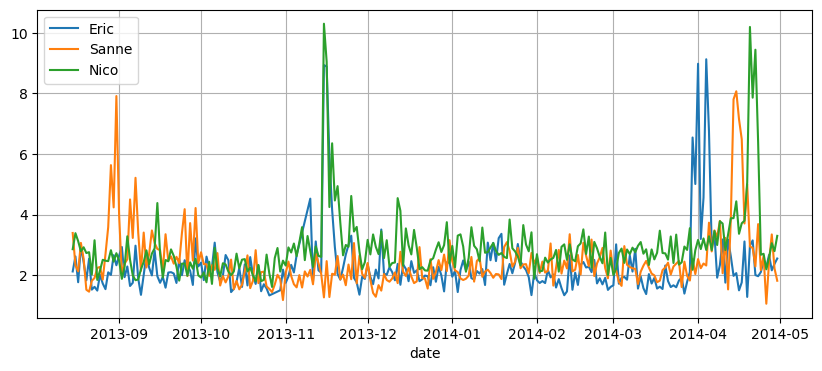

In [35]:
import matplotlib.pyplot as plt

grouped_birdday.altitude.mean()

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

plt.figure(figsize = (10,4))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [36]:
nico_daily_speed.iloc[232]

2.8324654508684053

In [37]:
print(nico_daily_speed.index[0])

key = pd.to_datetime('2013-08-15').date()
nico_daily_speed.index[0] == key

2013-08-15


True

In [38]:
for i in range(len(nico_daily_speed)):
    if nico_daily_speed.index[i] == pd.to_datetime('2014-04-04').date():
        print(i, nico_daily_speed.iloc[i])

232 2.8324654508684053


## Case Study 4: Homophily, Networks, and Nodes

**Homophily** is a property of networks.  Homophily occurs when nodes that are neighbors in a network also share a characteristic more often than nodes that are not network neighbors.  In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In [39]:
from collections import Counter
import numpy as np

def marginal_prob(chars):
    """
    Returns a dictionary, where keys are characteristics in
    chars and values are marginal probabilities for each characteristics
    """
    # keys: personal IDS, values: characteristics
    string = ""
    for characteristic in chars.values():
        string = string + str(characteristic) + " "
    string = string[:-1] # because there is empty space at the end
    freq_dict = Counter(string.split(" "))
    
    sum_freq = sum(freq_dict.values())
    new_dict = {}
    for characteristic in chars.values():
        new_dict[characteristic] = freq_dict[characteristic]/sum_freq

    return new_dict
  
def chance_homophily(chars):
    new_dict = {}
    for characteristic in chars.values():
        new_dict[characteristic] = np.square(marginal_prob(chars)[characteristic])
    
    return sum(new_dict.values())


favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


In [40]:
# The course offers a much simpler algorithm

from collections import Counter
import numpy as np

def marginal_prob(chars):
    frequencies = dict(Counter(chars.values()))
    sum_frequencies = sum(frequencies.values())
    return {char: freq / sum_frequencies for char, freq in frequencies.items()}
                
def chance_homophily(chars):
    marginal_probs = marginal_prob(chars)
    return np.sum(np.square(list(marginal_probs.values())))

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


In [41]:
import pandas as pd

df  = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@individual_characteristics.csv", low_memory=False, index_col=0)

df1 = df[df.village == 1]
df2 = df[df.village == 2]

df1.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0.0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,NaN,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1.0,Yes,1.0,Yes,No,NaN
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


In [42]:
print(df1[df1.pid == 100202].religion)

1    HINDUISM
Name: religion, dtype: object


In [43]:
sex1 = {}
for pid in df1.pid:
    sex1[pid] = df1[df1.pid == pid].resp_gend

print(sex1)

{100201: 0    1
Name: resp_gend, dtype: int64, 100202: 1    2
Name: resp_gend, dtype: int64, 100601: 2    1
Name: resp_gend, dtype: int64, 100602: 3    2
Name: resp_gend, dtype: int64, 100701: 4    1
Name: resp_gend, dtype: int64, 100702: 5    2
Name: resp_gend, dtype: int64, 100801: 6    1
Name: resp_gend, dtype: int64, 100802: 7    2
Name: resp_gend, dtype: int64, 100805: 8    2
Name: resp_gend, dtype: int64, 100806: 9    1
Name: resp_gend, dtype: int64, 100807: 10    1
Name: resp_gend, dtype: int64, 100808: 11    2
Name: resp_gend, dtype: int64, 101301: 12    2
Name: resp_gend, dtype: int64, 101302: 13    2
Name: resp_gend, dtype: int64, 101303: 14    2
Name: resp_gend, dtype: int64, 101601: 15    1
Name: resp_gend, dtype: int64, 101602: 16    2
Name: resp_gend, dtype: int64, 102001: 17    1
Name: resp_gend, dtype: int64, 102002: 18    2
Name: resp_gend, dtype: int64, 102004: 19    2
Name: resp_gend, dtype: int64, 102101: 20    1
Name: resp_gend, dtype: int64, 102102: 21    2
Name: 

However, we want a dictionary where keys are **personal ids**. To satisfy this condition, we need to set the index as pid using **dataFrame.set_index()**

In [44]:
sex1 = df1.set_index("pid")["resp_gend"].to_dict()

Voila!

In [45]:
# The course offers

sex1 = df1.set_index("pid")["resp_gend"].to_dict()
caste1 = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

sex2 = df2.set_index("pid")["resp_gend"].to_dict()
caste2 = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()

In [46]:
print("sex1:", chance_homophily(sex1),"\n")
print("caste1:", chance_homophily(caste1),"\n")
print("religion1:", chance_homophily(religion1),"\n")

print("sex2:", chance_homophily(sex2),"\n")
print("caste2:", chance_homophily(caste2),"\n")
print("religion2:", chance_homophily(religion2))

sex1: 0.5027299861680701 

caste1: 0.6741488509791551 

religion1: 0.9804896988521925 

sex2: 0.5005945303210464 

caste2: 0.425368244800893 

religion2: 1.0


In [47]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges(): #nodes that have edges
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2): # if nodes are connected i.e. a tie exists
                # Should `num_ties` be incremented?  What about `num_same_ties`?
                num_ties += 1 # # of ties
                if chars[IDs[n1]] == chars[IDs[n2]]: # if nodes also have the same characteristics
                    # Should `num_ties` be incremented?  What about `num_same_ties`?
                    num_same_ties += 1 # # of ties whose nodes have same characteristics
    return (num_same_ties / num_ties)    

In [48]:
data_filepath1 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_1.csv"
data_filepath2 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_2.csv"

# df  = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@individual_characteristics.csv", low_memory=False, index_col=0)

pid1 = pd.read_csv(data_filepath1, index_col=0)
pid2 = pd.read_csv(data_filepath2, index_col=0)

pid1.iloc[100]

0    102205
Name: 100, dtype: int64

In [49]:
import networkx as nx

A1 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno1.csv", index_col=0))
A2 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno2.csv", index_col=0))
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

pid1 = pd.read_csv(data_filepath1, dtype=int)['0'].to_dict()
pid2 = pd.read_csv(data_filepath2, dtype=int)['0'].to_dict()



# Enter your code here!

sex1 = df1.set_index("pid")["resp_gend"].to_dict()
caste1 = df1.set_index("pid")["caste"].to_dict()
religion1 = df1.set_index("pid")["religion"].to_dict()

sex2 = df2.set_index("pid")["resp_gend"].to_dict()
caste2 = df2.set_index("pid")["caste"].to_dict()
religion2 = df2.set_index("pid")["religion"].to_dict()


print(homophily(G1,sex1,pid1),homophily(G1,caste1,pid1),homophily(G1,religion1,pid1),"\n")
print(homophily(G2,sex2,pid2),homophily(G2,caste2,pid2),homophily(G2,religion2,pid2),"\n\n")

print(chance_homophily(sex1),chance_homophily(caste1),chance_homophily(religion1),"\n")
print(chance_homophily(sex2),chance_homophily(caste2),chance_homophily(religion2))

0.5908629441624366 0.7959390862944162 0.9908629441624366 

0.5658073270013568 0.8276797829036635 1.0 


0.5027299861680701 0.6741488509791551 0.9804896988521925 

0.5005945303210464 0.425368244800893 1.0


 The results says that all characteristics in all villages(except religion in Village 2) are observerd homophily higher than the chance homophily. The religion in village 2 is already has the highest chance in both, which is 1.